In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib notebook

import sys
sys.path.append('..')

from helper import nn
from helper import logistic_regression as lr
import numpy as np

# get data and weights

In [2]:
X_raw, y_raw = nn.load_data('ex4data1.mat', transpose=False)
X = np.insert(X_raw, 0, np.ones(X_raw.shape[0]), axis=1)
X.shape

(5000, 401)

In [3]:
y = nn.expand_y(y_raw)
y.shape

(5000, 10)

In [4]:
t1, t2 = nn.load_weight('ex4weights.mat')
t1.shape, t2.shape

((25, 401), (10, 26))

In [5]:
theta = nn.serialize(t1, t2)  # flatten params
theta.shape

(10285,)

# sigmoid gradient

In [6]:
nn.sigmoid_gradient(0)

0.25

# theta gradient
super hard to get this right... the dimension is so confusing

In [7]:
d1, d2 = nn.deserialize(nn.gradient(theta, X, y))

In [8]:
d1.shape, d2.shape

((25, 401), (10, 26))

# gradient checking
<img style="float: left;" src="../img/gradient_checking.png">

In [9]:
# nn.gradient_checking(theta, X, y, epsilon= 0.0001)

# regularized gradient
Use normal gradient + regularized term

<img style="float: left;" src="../img/nn_reg_grad.png">

In [10]:
# nn.gradient_checking(theta, X, y, epsilon=0.0001, regularized=True)

# ready to train the model

> remember to randomly initlized the parameters to break symmetry

take a look at the doc of this argument: `jac`

>jac : bool or callable, optional
Jacobian (gradient) of objective function. Only for CG, BFGS, Newton-CG, L-BFGS-B, TNC, SLSQP, dogleg, trust-ncg. **If jac is a Boolean and is True, fun is assumed to return the gradient along with the objective function.** If False, the gradient will be estimated numerically. jac can also be a callable returning the gradient of the objective. In this case, it must accept the same arguments as fun.

it means if your `backprop` function return `(cost, grad)`, you could set `jac=True`  

This is the implementation of http://nbviewer.jupyter.org/github/jdwittenauer/ipython-notebooks/blob/master/notebooks/ml/ML-Exercise4.ipynb

but I choose to seperate them

In [11]:
res = nn.nn_training(X, y)
res

     fun: 0.315404193057851
     jac: array([ -9.87946759e-05,  -2.58841584e-08,   5.74177576e-08, ...,
         5.84882083e-05,   8.65063516e-05,   4.38541405e-05])
 message: 'Max. number of function evaluations reached'
    nfev: 400
     nit: 26
  status: 3
 success: False
       x: array([  0.00000000e+00,  -1.29420792e-04,   2.87088788e-04, ...,
         1.79382032e-01,  -1.35645264e+00,  -1.62269753e+00])

# show accuracy

In [12]:
_, y_answer = nn.load_data('ex4data1.mat')
y_answer[:20]

array([10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10,
       10, 10, 10], dtype=uint8)

In [13]:
final_theta = res.x

In [16]:
nn.show_accuracy(final_theta, X, y_answer)

             precision    recall  f1-score   support

          1       0.99      0.98      0.98       500
          2       0.96      0.98      0.97       500
          3       0.97      0.93      0.95       500
          4       1.00      0.87      0.93       500
          5       1.00      0.58      0.73       500
          6       0.91      0.99      0.95       500
          7       0.99      0.96      0.97       500
          8       0.87      1.00      0.93       500
          9       0.97      0.95      0.96       500
         10       0.71      1.00      0.83       500

avg / total       0.94      0.92      0.92      5000



# show hidden layer

<IPython.core.display.Javascript object>


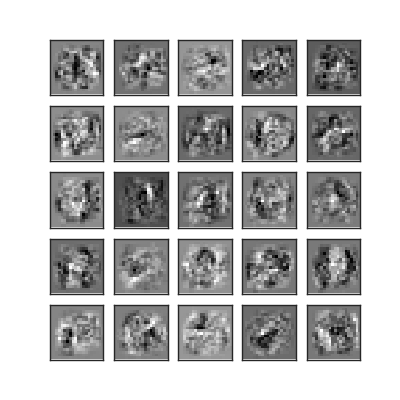

In [15]:
nn.plot_hidden_layer(final_theta)